# Supervised ML - Imbalanced Learning
In the supervised setting, the class label for each record in the training set are provided and the goal is to train a classifier that would be used for the prediction on unseen data. Here, we have trained two classifiers

1. Logistic Regression

2. Random Forest

The results are below show that the two classifiers perform extremely well on the dataset. The AUC-ROC and AUC-PRC are $100\%$ for on the training (cross-validation) and test sets

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model selection
from sklearn.model_selection import train_test_split

In [2]:
# Import custom class
%run -i '../src/helper/transfxns.py'
%run -i '../src/helper/sup_ml.py'

In [3]:
# Instantiate the classes
transfxn = TransformationPipeline()
model = SupervisedModels()

# Load data

In [3]:
df = pd.read_csv('../data/kdd99-unsupervised-ad.csv', header = None)
print("Data size:", df.shape) # print data size
df.columns = ['v_{}'.format(i) for i in range(30)] # column names
df.head()

Data size: (620098, 30)


,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29
0,0.0,215.0,45076.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
2,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
3,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
4,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n


# Categorical variables encoded as integers

In [4]:
# Convert to string
cols = ['v_6', 'v_7', 'v_8', 'v_9']
for i, val in enumerate(cols):
    df[val] = df[val].astype('O')

# Create feature matrix and class label

In [5]:
X, y = df.drop('v_29', axis = 1), df.v_29

In [6]:
y = y.map({'n':0, 'o':1}) # Map to binary

# Create a Test Set
Stratify sampling with 20 $\%$ test set and 80 $\%$ training set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42, stratify = y)

In [8]:
print('Training set size:', X_train.shape, y_train.shape)
print('Test set size:', X_test.shape, y_test.shape)

Training set size: (496078, 29) (496078,)
Test set size: (124020, 29) (124020,)


In [9]:
print('Training set class distribution:\n', (y_train.value_counts()/X_train.shape[0])*100)
print('--' * 15)
print('Test set class distribution:\n', (y_test.value_counts()/X_test.shape[0])*100)

Training set class distribution:
 0    99.830269
1     0.169731
Name: v_29, dtype: float64
------------------------------
Test set class distribution:
 0    99.830672
1     0.169328
Name: v_29, dtype: float64


# Transformation pipeline

In [11]:
# Transform and scale data
X_train_scaled, X_test_scaled, feat_nm = transfxn.preprocessing(X_train, X_test)

In [12]:
print('Training set size after pre-processing:', X_train_scaled.shape, y_train.shape)
print('Test set size after pre-processing:', X_test_scaled.shape, y_test.shape)

Training set size after pre-processing: (496078, 33) (496078,)
Test set size after pre-processing: (124020, 33) (124020,)


In [13]:
# Convert the class labels to arrays
y_train, y_test = y_train.values, y_test.values

# A. Model Selection by Cross-Validation

## A-1. Logistic Regression

In [15]:
lr_clf = LogisticRegression()
model.eval_metrics_cv(lr_clf, X_train_scaled, y_train, cv_fold = 5, 
                      scoring = 'accuracy', model_nm = 'Logistic Regression')

5-Fold cross-validation results for Logistic Regression
------------------------------------------------------------
Accuracy (std): 0.999964 (0.000022)
AUROC: 0.999995
AUPRC: 0.992544
Predicted classes: [0 1]
Confusion matrix:
 [[495229      7]
 [    11    831]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    495236
           1       0.99      0.99      0.99       842

    accuracy                           1.00    496078
   macro avg       1.00      0.99      0.99    496078
weighted avg       1.00      1.00      1.00    496078

------------------------------------------------------------


## A-2. Random Forest

In [16]:
rf_clf = RandomForestClassifier(random_state = 42)
model.eval_metrics_cv(rf_clf, X_train_scaled, y_train, cv_fold = 5, 
                      scoring = 'accuracy', model_nm = 'Random Forest')

5-Fold cross-validation results for Random Forest
------------------------------------------------------------
Accuracy (std): 0.999990 (0.000011)
AUROC: 1.000000
AUPRC: 0.999916
Predicted classes: [0 1]
Confusion matrix:
 [[495235      1]
 [     4    838]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    495236
           1       1.00      1.00      1.00       842

    accuracy                           1.00    496078
   macro avg       1.00      1.00      1.00    496078
weighted avg       1.00      1.00      1.00    496078

------------------------------------------------------------


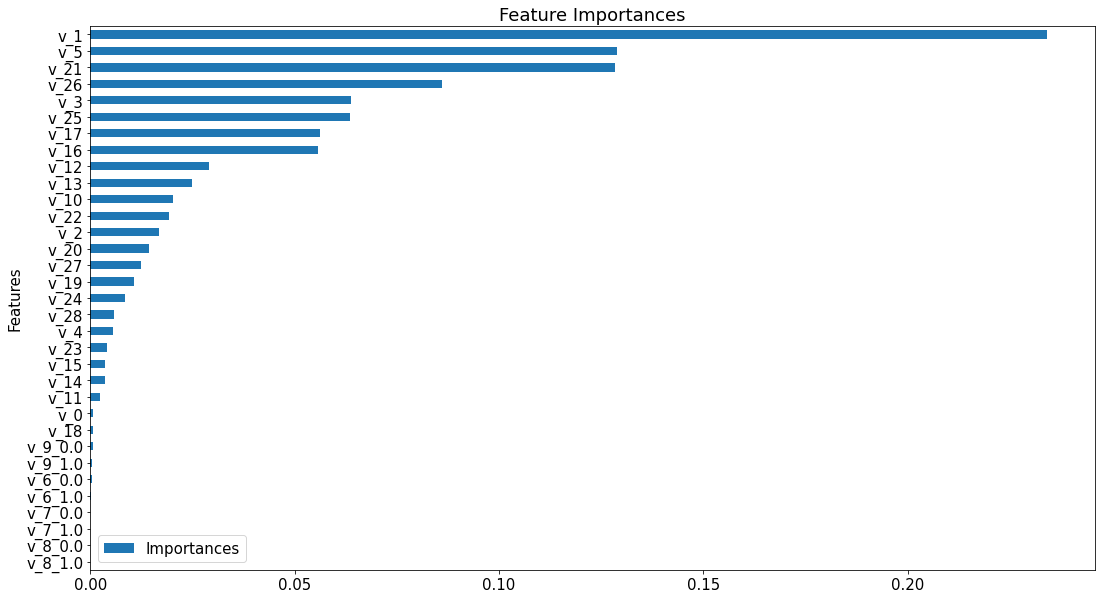

In [79]:
# Compute feature importances
importances_df = pd.DataFrame({'Features': feat_nm, 
                               'Importances': rf_clf.feature_importances_})
# Plot
importances_df.sort_values('Importances', ascending = True, inplace = True)
importances_df.set_index('Features', inplace = True)
importances_df.plot(kind='barh', figsize = (18,10))
plt.title('Feature Importances')
plt.savefig('../image/imp.png')

# B. Test Prediction

## B-1. Logistic Regression

In [18]:
model.test_pred(lr_clf, X_test_scaled, y_test, model_nm = 'Logistic Regression')

Test predictions for Logistic Regression
------------------------------------------------------------
Accuracy:  0.999984
AUROC: 1.000000
AUPRC: 0.999955
Predicted classes: [0 1]
Confusion matrix:
 [[123810      0]
 [     2    208]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    123810
           1       1.00      0.99      1.00       210

    accuracy                           1.00    124020
   macro avg       1.00      1.00      1.00    124020
weighted avg       1.00      1.00      1.00    124020

------------------------------------------------------------


## B-2. Random Forest

In [19]:
model.test_pred(rf_clf, X_test_scaled, y_test, model_nm = 'Random Forest')

Test predictions for Random Forest
------------------------------------------------------------
Accuracy:  0.999992
AUROC: 1.000000
AUPRC: 1.000000
Predicted classes: [0 1]
Confusion matrix:
 [[123810      0]
 [     1    209]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    123810
           1       1.00      1.00      1.00       210

    accuracy                           1.00    124020
   macro avg       1.00      1.00      1.00    124020
weighted avg       1.00      1.00      1.00    124020

------------------------------------------------------------


# C. ROC and PR Curves

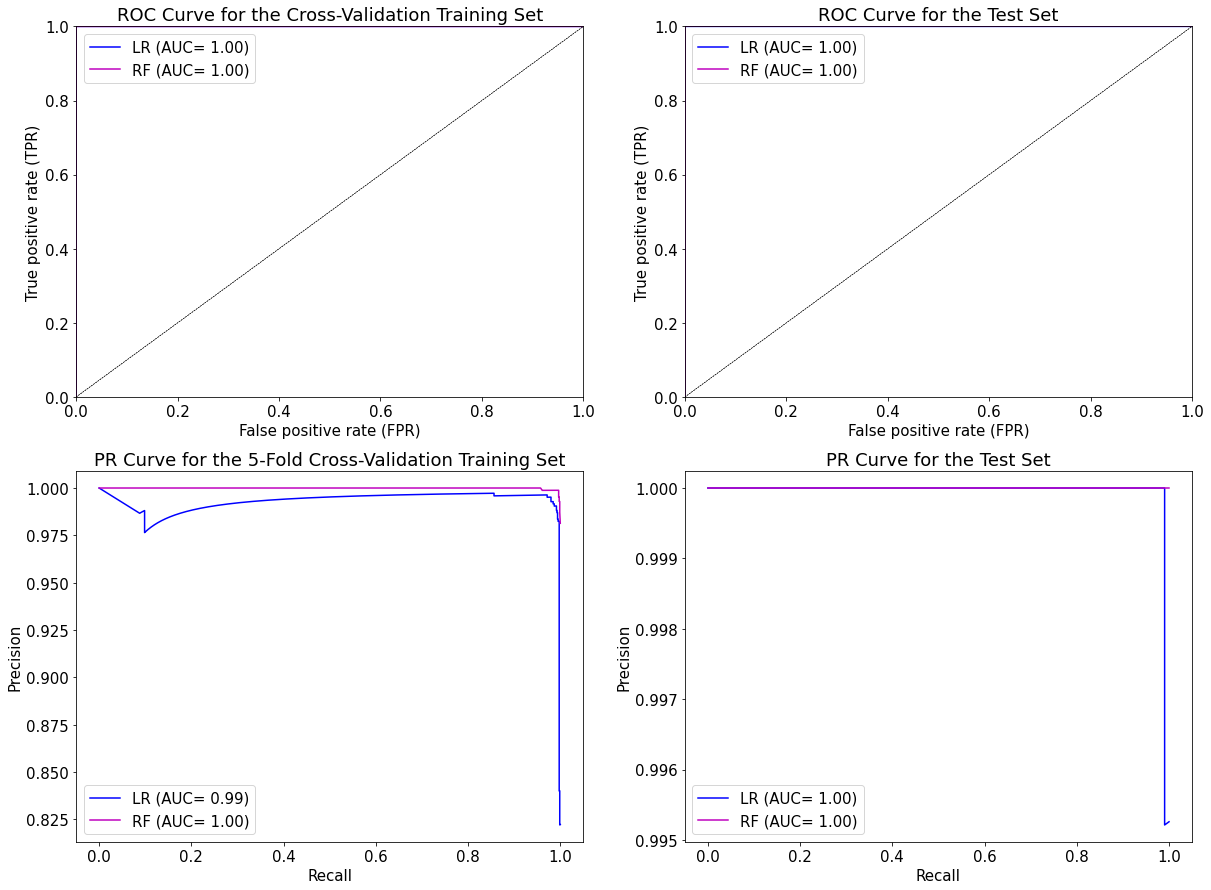

In [17]:
plt.figure(figsize = (20,15))

# LR
model.plot_roc_pr_curves(lr_clf, X_train_scaled, y_train, X_test_scaled, y_test,
                         cv_fold = 5, color= 'b', label= 'LR (AUC= %0.2f)')

# RF
model.plot_roc_pr_curves(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test,
                         cv_fold = 5, color= 'm', label= 'RF (AUC= %0.2f)')